## Calculate human consensus picks overall accuracy

In [65]:
import pandas as pd

df = pd.read_csv('../data/games_data.csv').dropna(axis=0)

df = df.filter(['PTS_home', 'PTS_away','OVER_CONSENSUS', 'UNDER_CONSENSUS', 'SB_TOTAL'])

pred_correct = 0;

pts_total = df['PTS_home'] + df['PTS_away'];

actual_over_sb_total = (pts_total > df['SB_TOTAL']);

over_consensus = df['OVER_CONSENSUS']
under_consensus = df['UNDER_CONSENSUS']

consensus_is_over = [];

for o, u in zip(over_consensus, under_consensus):
    if o > u:
        consensus_is_over.append(True);
    elif u > o:
        consensus_is_over.append(False);
    else:
        consensus_is_over.append(None);

df = df.assign(PTS_TOTAL = pts_total)
df = df.assign(PTS_TOTAL_OVER_SB = actual_over_sb_total)
df = df.assign(CONSENSUS_MAJORITY_OVER_SB = consensus_is_over)

,PTS_home,PTS_away,OVER_CONSENSUS,UNDER_CONSENSUS,SB_TOTAL,PTS_TOTAL,PTS_TOTAL_OVER_SB,CONSENSUS_MAJORITY_OVER_SB
0,126.0,117.0,690.0,390.0,228.0,243.0,True,True
1,120.0,112.0,819.0,529.0,232.0,232.0,False,True
2,114.0,106.0,744.0,441.0,215.5,220.0,True,True
3,113.0,93.0,593.0,340.0,222.0,206.0,False,True
4,108.0,110.0,482.0,460.0,235.5,218.0,False,True
...,...,...,...,...,...,...,...,...
2538,121.0,114.0,844.0,347.0,216.5,235.0,True,True
2539,121.0,107.0,588.0,565.0,215.5,228.0,True,True
2540,113.0,107.0,910.0,415.0,218.5,220.0,True,True
2542,122.0,121.0,858.0,558.0,223.0,243.0,True,True


In [4]:
con_correct = df['PTS_TOTAL_OVER_SB'] == df['CONSENSUS_MAJORITY_OVER_SB']
df2 = pd.DataFrame(con_correct, columns=['CONSENSUS_CORRECT'])
df2['CONSENSUS_CORRECT'].value_counts(normalize=True).mul(100).astype(str)+'%'

CONSENSUS_CORRECT
False    51.193967322999576%
True     48.806032677000424%
Name: proportion, dtype: object

In [29]:
df3 = df[['OVER_CONSENSUS', 'UNDER_CONSENSUS']]
df3 = df3.assign(OVER_PCT=round((df3['OVER_CONSENSUS'] / (df3['OVER_CONSENSUS'] + df3['UNDER_CONSENSUS'])) * 100, 1))
df3 = df3.assign(UNDER_PCT=round((df3['UNDER_CONSENSUS'] / (df3['OVER_CONSENSUS'] + df3['UNDER_CONSENSUS'])) * 100, 1))

df3

,OVER_CONSENSUS,UNDER_CONSENSUS,OVER_PCT,UNDER_PCT
0,690.0,390.0,63.9,36.1
1,819.0,529.0,60.8,39.2
2,744.0,441.0,62.8,37.2
3,593.0,340.0,63.6,36.4
4,482.0,460.0,51.2,48.8
...,...,...,...,...
2547,375.0,791.0,32.2,67.8
2548,468.0,716.0,39.5,60.5
2549,691.0,696.0,49.8,50.2
2550,933.0,1051.0,47.0,53.0


<Axes: >

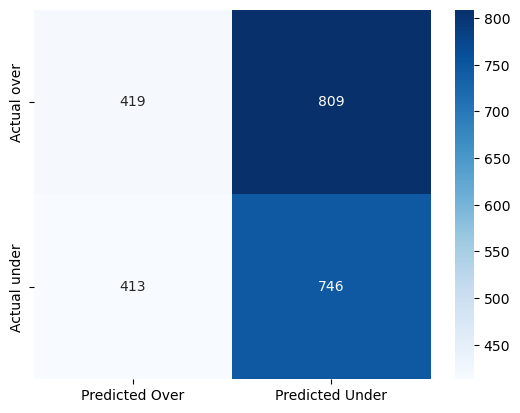

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay
)

cm = np.array(confusion_matrix(df['PTS_TOTAL_OVER_SB'], df['CONSENSUS_MAJORITY_OVER_SB'], labels=[0,1]))
confusion = pd.DataFrame(cm, index=['Actual over', 'Actual under'], columns=['Predicted Over', 'Predicted Under'])
sns.heatmap(confusion,annot=True,fmt='g',cmap=plt.cm.Blues)

Text(0, 0.5, 'Number of games')

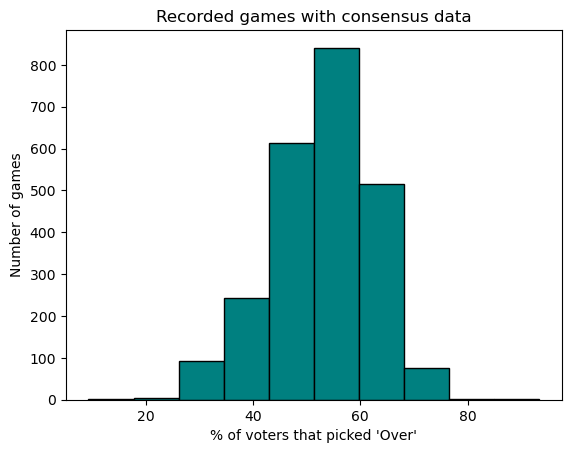

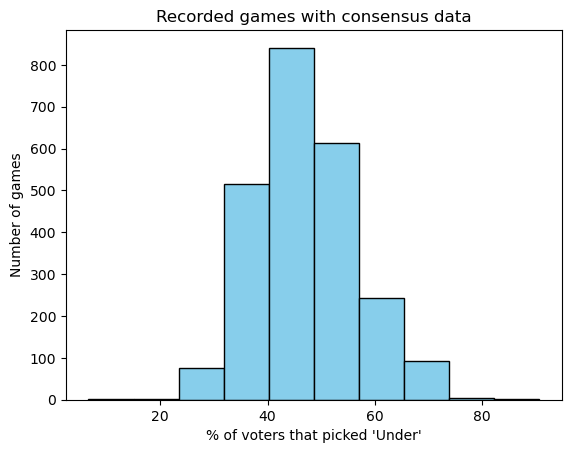

In [58]:
fig1, ax1 = plt.subplots(1, 1) 
ax1.hist(df3['OVER_PCT'], color='teal', ec='black')
  
ax1.set_title("Recorded games with consensus data") 
 
ax1.set_xlabel("% of voters that picked 'Over'") 
ax1.set_ylabel('Number of games') 

fig2, ax2 = plt.subplots(1, 1) 
ax2.hist(df3['UNDER_PCT'], color='skyblue', ec='black') 
  
ax2.set_title("Recorded games with consensus data") 
 
ax2.set_xlabel("% of voters that picked 'Under'") 
ax2.set_ylabel('Number of games') 

In [72]:
# get rows where number of voters were the same for both sides
print('Number of games with same amount of voters on each side:')
df.loc[df['CONSENSUS_MAJORITY_OVER_SB'] == None].shape[0]

Number of games with same amount of voters on each side:


0

In [76]:
print("Accuracy of consensus predictions: ")
preds = df[df['PTS_TOTAL_OVER_SB'], df['CONSENSUS_MAJORITY_OVER_SB']]
times_correct = preds.value_counts[True]
print(times_correct)

Accuracy of consensus predictions: 


InvalidIndexError: (0        True
1       False
2        True
3       False
4       False
        ...  
2547     True
2548    False
2549    False
2550    False
2551     True
Name: PTS_TOTAL_OVER_SB, Length: 2387, dtype: bool, 0        True
1        True
2        True
3        True
4        True
        ...  
2547    False
2548    False
2549    False
2550    False
2551    False
Name: CONSENSUS_MAJORITY_OVER_SB, Length: 2387, dtype: bool)